<a href="https://colab.research.google.com/github/ManikantaSanjay/Data_Analysis_Using_Python_Libraries_Series/blob/main/Facebook_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACEBOOK Data Analysis**


In [ ]:
!pip install opendatasets

In [ ]:
dataset_url = 'https://www.kaggle.com/sheenabatra/facebook-data'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manikantasanjayv
Your Kaggle Key: ··········


100%|██████████| 1.82M/1.82M [00:00<00:00, 86.2MB/s]

In [ ]:
data_dir = './facebook-data'


In [ ]:
import os
os.listdir(data_dir)


['pseudo_facebook.csv']

In [ ]:
project_name = "facebook_data_analysis" 

## **Data Preparation and Cleaning**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('./facebook-data/pseudo_facebook.csv')

In [ ]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(99003, 15)

In [ ]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [ ]:
df['age'].value_counts()

18     5196
23     4404
19     4391
20     3769
21     3671
       ... 
87       42
112      18
111      18
110      15
109       9
Name: age, Length: 101, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['gender'])

## **Exploratory Analysis and Visualization**
**Analysing facebook data visually**


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (20,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**AGE ANALYSIS**  - Exploring which age group uses more facebook comparatively and we clearly see teenagers are more using facebook comparatively to others

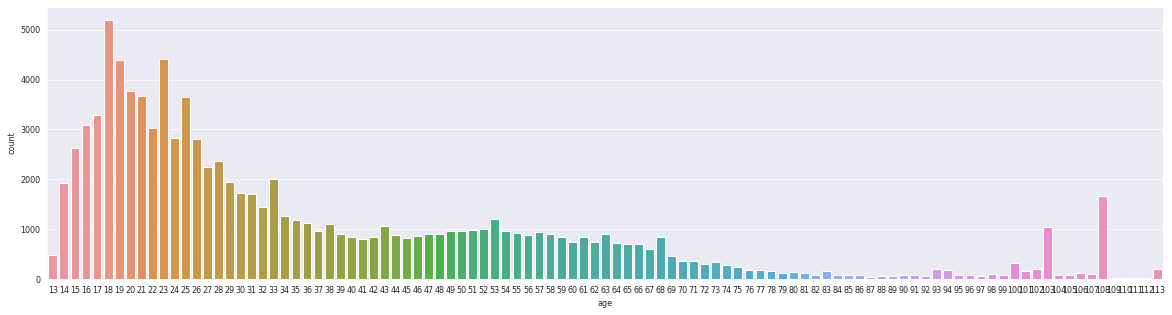

In [ ]:
sns.countplot(x='age',data=df)

**LIKES Analysis of according to gender and age**

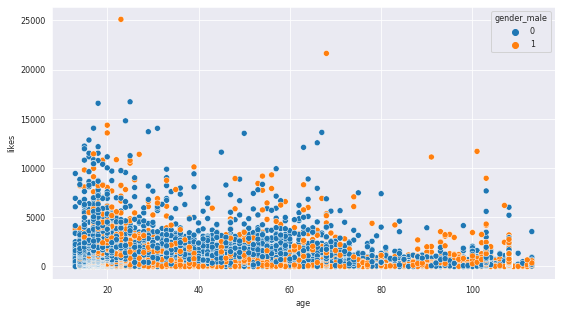

In [ ]:
matplotlib.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x="age", y="likes", hue="gender_male",data=df)

**Correlation Data Analysis**

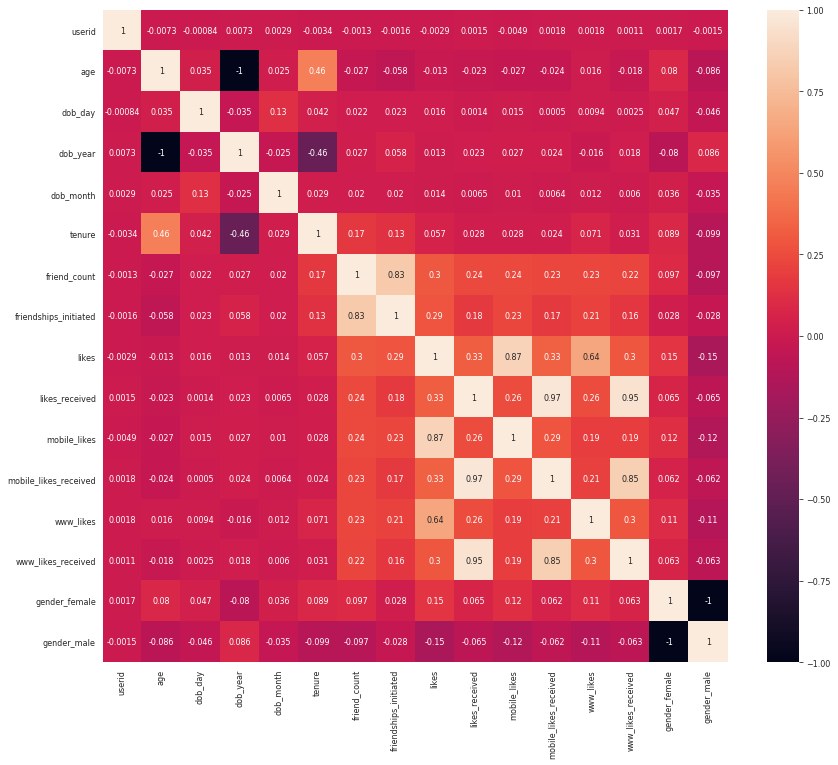

In [ ]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## **Questions and Answers**

Q1: Highest and the Lowest Number of Likes in the Dataset?

In [ ]:
maximum_likes = df['likes'].max()
minimum_likes = df['likes'].min()

In [ ]:
print("maximum likes:", maximum_likes)
print("minimum likes:", minimum_likes)

maximum likes: 25111
minimum likes: 0


From this we infer the maximum and the minimum likes.

Q2: Analyse which age group uses the mobile or the website through likes

In [ ]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df.age,bins=np.arange(10,121,10),labels=labels,right=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mobile users')

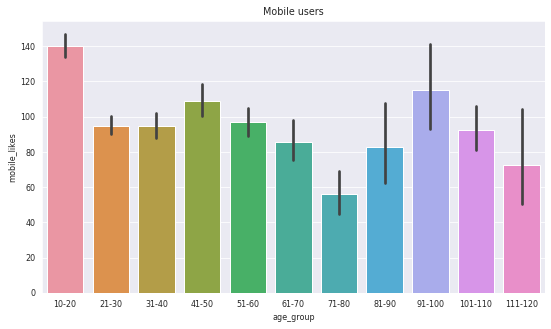

In [ ]:
sns.barplot(df['age_group'],df['mobile_likes'])
plt.title("Mobile users")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Website users')

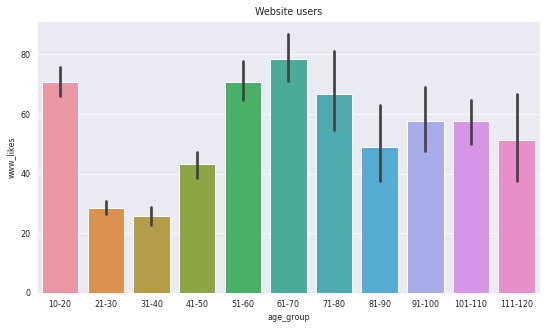

In [ ]:
sns.barplot(df['age_group'],df['www_likes'])
plt.title("Website users")

From this we came to know about **51-70** age group uses **website** for using facebook and around age group between **10-20** uses the **mobile app**.

Q3: Analyse the friend count with reference to the age group

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


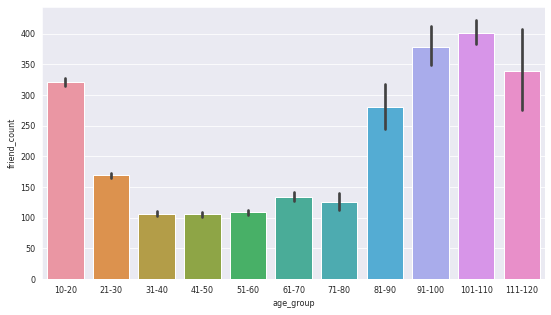

In [ ]:
sns.barplot(df['age_group'],df['friend_count'])

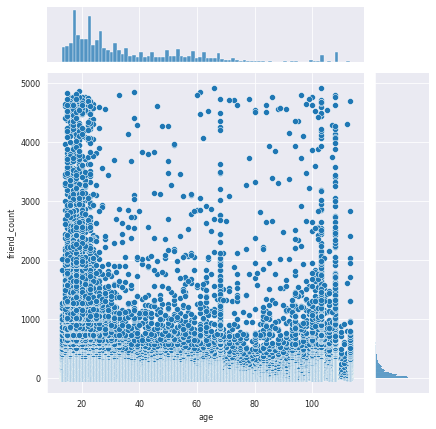

In [ ]:
sns.jointplot(x='age',y='friend_count',data=df)

From this graph we conclude that **more friends** are counted for senior citizen i.e. age-group of **above 80** and for the youngsters or teenagers of age **between 10-20**

Q4: How many likes have being given in total? Also differentiate the likes given by males and females.

In [ ]:
total_likes = df['likes'].sum()

In [ ]:
print("Total number of likes over: ", total_likes)

Total number of likes over:  15452268


Total number of likes are **15452268**

In [ ]:
total_likes_male = df.groupby("gender_male")["likes"].sum()

In [ ]:
total_likes_male

gender_male
0    10492345
1     4959923
Name: likes, dtype: int64

Here 0 shows number of likes given by **males** i.e. **10492345** and 1 represents the likes given by the **females** i.e. **4959923**

Q5: Who has more number of friends males or females?

In [ ]:
df_updated = pd.read_csv('./facebook-data/pseudo_facebook.csv')

In [ ]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df_updated['age_group'] = pd.cut(df_updated.age,bins=np.arange(10,121,10),labels=labels,right=True)

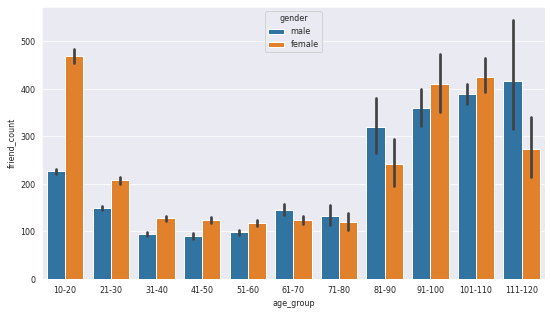

In [ ]:
sns.barplot(x=df_updated['age_group'],y=df_updated['friend_count'],hue=df_updated.gender)

This shows **females have more friends** than males

## **Inferences and Conclusion**




1.   The countplot helps in age analysis and showed the  relation between facebook users according to the age.
2.   Scatter plot gives a more enhanced way of differentiating between males and females.
3.   Maximum number of likes recorded was 25111.
4.   Their are equal amount of facebook web app user and mobile app user.






